In [69]:
# Copyright 2018 Amazon.com, Inc. or its affiliates. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License").
# You may not use this file except in compliance with the License.
# A copy of the License is located at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# or in the "license" file accompanying this file. This file is distributed
# on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either
# express or implied. See the License for the specific language governing
# permissions and limitations under the License.

import logging
from collections import OrderedDict
from functools import partial
from pathlib import Path

from gluonts.dataset.artificial import ConstantDataset
from gluonts.dataset.common import TrainDatasets, load_datasets
from gluonts.dataset.repository._artificial import generate_artificial_dataset
from gluonts.dataset.repository._lstnet import generate_lstnet_dataset
from gluonts.dataset.repository._m4 import generate_m4_dataset
from gluonts.support.util import get_download_path

m4_freq = "Hourly"
pandas_freq = "H"
dataset_path = Path(f"m4-{m4_freq}")
prediction_length = 48

dataset_recipes = OrderedDict(
    {
        # each recipe generates a dataset given a path
#         "constant": partial(
#             generate_artificial_dataset, dataset=ConstantDataset()
#         ),
#         "exchange_rate": partial(
#             generate_lstnet_dataset, dataset_name="exchange_rate"
#         ),
#         "solar-energy": partial(
#             generate_lstnet_dataset, dataset_name="solar-energy"
#         ),
#         "electricity": partial(
#             generate_lstnet_dataset, dataset_name="electricity"
#         ),
#         "traffic": partial(generate_lstnet_dataset, dataset_name="traffic"),
        "m4_hourly": partial(
            generate_m4_dataset,
            m4_freq="Hourly",
            pandas_freq="H",
            prediction_length=48,
        ),
        "m4_daily": partial(
            generate_m4_dataset,
            m4_freq="Daily",
            pandas_freq="D",
            prediction_length=14,
        ),
        "m4_weekly": partial(
            generate_m4_dataset,
            m4_freq="Weekly",
            pandas_freq="W",
            prediction_length=13,
        ),
        "my_weekly_test": partial(
            generate_m4_dataset,
            m4_freq="Weekly",
            pandas_freq="W",
            prediction_length=13,
        ),
        "m4_monthly": partial(
            generate_m4_dataset,
            m4_freq="Monthly",
            pandas_freq="M",
            prediction_length=18,
        ),
        "m4_quarterly": partial(
            generate_m4_dataset,
            m4_freq="Quarterly",
            pandas_freq="3M",
            prediction_length=8,
        ),
        "m4_yearly": partial(
            generate_m4_dataset,
            m4_freq="Yearly",
            pandas_freq="12M",
            prediction_length=6,
        ),
        "my_yearly_test": partial(
            generate_m4_dataset,
            m4_freq="Yearly",
            pandas_freq="12M",
            prediction_length=6,
        ),
        "my_m4_yearly": partial(
            generate_m4_dataset,
            m4_freq="Yearly",
            pandas_freq="12M",
            prediction_length=6,
        ),
        "m4_yearly_industry": partial(
            generate_m4_dataset,
            m4_freq="Yearly",
            pandas_freq="12M",
            prediction_length=6,
        ),
        "m4_yearly_macro": partial(
            generate_m4_dataset,
            m4_freq="Yearly",
            pandas_freq="12M",
            prediction_length=6,
        ),
        "m4_yearly_micro": partial(
            generate_m4_dataset,
            m4_freq="Yearly",
            pandas_freq="12M",
            prediction_length=6,
        ),
    }
)

dataset_names = list(dataset_recipes.keys())

default_dataset_path = get_download_path() / "datasets"


def materialize_dataset(
    dataset_name: str,
    path: Path = default_dataset_path,
    regenerate: bool = False,
) -> Path:
    """
    Ensures that the dataset is materialized under the `path / dataset_name`
    path.

    Parameters
    ----------
    dataset_name
        name of the dataset, for instance "m4_hourly"
    regenerate
        whether to regenerate the dataset even if a local file is present.
        If this flag is False and the file is present, the dataset will not
        be downloaded again.
    path
        where the dataset should be saved
    Returns
    -------
        the path where the dataset is materialized
    """
    assert dataset_name in dataset_recipes.keys(), (
        f"{dataset_name} is not present, please choose one from "
        f"{dataset_recipes.keys()}."
    )

    path.mkdir(parents=True, exist_ok=True)
    dataset_path = path / dataset_name

    dataset_recipe = dataset_recipes[dataset_name]

    if not dataset_path.exists() or regenerate:
        logging.info(f"downloading and processing {dataset_name}")
        dataset_recipe(dataset_path=dataset_path)
    else:
        logging.info(
            f"using dataset already processed in path {dataset_path}."
        )

    return dataset_path



def get_dataset(
    dataset_name: str,
    path: Path = default_dataset_path,
    regenerate: bool = False,
) -> TrainDatasets:
    """
    Get a repository dataset.

    The datasets that can be obtained through this function have been used
    with different processing over time by several papers (e.g., [SFG17]_,
    [LCY+18]_, and [YRD15]_).

    Parameters
    ----------
    dataset_name
        name of the dataset, for instance "m4_hourly"
    regenerate
        whether to regenerate the dataset even if a local file is present.
        If this flag is False and the file is present, the dataset will not
        be downloaded again.
    path
        where the dataset should be saved
    Returns
    -------
        dataset obtained by either downloading or reloading from local file.
    """
    dataset_path = materialize_dataset(dataset_name, path, regenerate)

    return load_datasets(
        metadata=dataset_path,
        train=dataset_path / "train",
        test=dataset_path / "test",
    )



if __name__ == "__main__":

    for dataset in dataset_names:
        print(f"generate {dataset}")
        ds = get_dataset(dataset, regenerate=False)
        print(ds.metadata)
        print(sum(1 for _ in list(iter(ds.train))))

generate m4_hourly


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_hourly.


MetaData freq='H' target=None feat_static_cat=[<CategoricalFeatureInfo name='feat_static_cat' cardinality='414'>] feat_static_real=[] feat_dynamic_real=[] feat_dynamic_cat=[] prediction_length=48
414
generate m4_daily


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_daily.


MetaData freq='D' target=None feat_static_cat=[<CategoricalFeatureInfo name='feat_static_cat' cardinality='4227'>] feat_static_real=[] feat_dynamic_real=[] feat_dynamic_cat=[] prediction_length=14
4227
generate m4_weekly


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_weekly.


MetaData freq='W' target=None feat_static_cat=[<CategoricalFeatureInfo name='feat_static_cat' cardinality='359'>] feat_static_real=[] feat_dynamic_real=[] feat_dynamic_cat=[] prediction_length=13
359
generate my_weekly_test


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\my_weekly_test.


MetaData freq='W' target=None feat_static_cat=[<CategoricalFeatureInfo name='feat_static_cat' cardinality='359'>] feat_static_real=[] feat_dynamic_real=[] feat_dynamic_cat=[] prediction_length=13
359
generate m4_monthly


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly.


MetaData freq='M' target=None feat_static_cat=[<CategoricalFeatureInfo name='feat_static_cat' cardinality='48000'>] feat_static_real=[] feat_dynamic_real=[] feat_dynamic_cat=[] prediction_length=18
48000
generate m4_quarterly


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_quarterly.


MetaData freq='3M' target=None feat_static_cat=[<CategoricalFeatureInfo name='feat_static_cat' cardinality='24000'>] feat_static_real=[] feat_dynamic_real=[] feat_dynamic_cat=[] prediction_length=8
24000
generate m4_yearly


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_yearly.


MetaData freq='12M' target=None feat_static_cat=[<CategoricalFeatureInfo name='feat_static_cat' cardinality='23000'>] feat_static_real=[] feat_dynamic_real=[] feat_dynamic_cat=[] prediction_length=6
23000
generate m4_yearly_d


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_yearly_d.


MetaData freq='12M' target=None feat_static_cat=[<CategoricalFeatureInfo name='feat_static_cat' cardinality='23000'>] feat_static_real=[] feat_dynamic_real=[] feat_dynamic_cat=[] prediction_length=6
23000
generate my_m4_yearly


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\my_m4_yearly.


MetaData freq='12M' target=None feat_static_cat=[<CategoricalFeatureInfo name='feat_static_cat' cardinality='23000'>] feat_static_real=[] feat_dynamic_real=[] feat_dynamic_cat=[] prediction_length=6
23000
generate m4_yearly_industry


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_yearly_industry.


MetaData freq='12M' target=None feat_static_cat=[<CategoricalFeatureInfo name='feat_static_cat' cardinality='3716'>] feat_static_real=[] feat_dynamic_real=[] feat_dynamic_cat=[] prediction_length=6
3716
generate m4_yearly_macro


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_yearly_macro.


MetaData freq='12M' target=None feat_static_cat=[<CategoricalFeatureInfo name='feat_static_cat' cardinality='3903'>] feat_static_real=[] feat_dynamic_real=[] feat_dynamic_cat=[] prediction_length=6
3903
generate m4_yearly_micro


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_yearly_micro.


MetaData freq='12M' target=None feat_static_cat=[<CategoricalFeatureInfo name='feat_static_cat' cardinality='6538'>] feat_static_real=[] feat_dynamic_real=[] feat_dynamic_cat=[] prediction_length=6
6538


In [70]:
dataset = get_dataset("m4_yearly_d", regenerate=False)

INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_yearly_d.


In [71]:
# imports
%matplotlib inline
import mxnet as mx
from mxnet import gluon
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
from itertools import islice
from pathlib import Path

from gluonts.dataset.util import to_pandas


In [72]:
mx.random.seed(0)
np.random.seed(0)

In [73]:
print(f"Available datasets: {list(dataset_recipes.keys())}")

Available datasets: ['m4_hourly', 'm4_daily', 'm4_weekly', 'my_weekly_test', 'm4_monthly', 'm4_quarterly', 'm4_yearly', 'm4_yearly_d', 'my_m4_yearly', 'm4_yearly_industry', 'm4_yearly_macro', 'm4_yearly_micro']


In [74]:
# get the first time series in the training set
train_entry = next(iter(dataset.train))
train_entry.keys()

dict_keys(['start', 'target', 'feat_static_cat', 'source'])

In [75]:
# get the first time series in the test set
test_entry = next(iter(dataset.test))
test_entry.keys()

dict_keys(['start', 'target', 'feat_static_cat', 'source'])

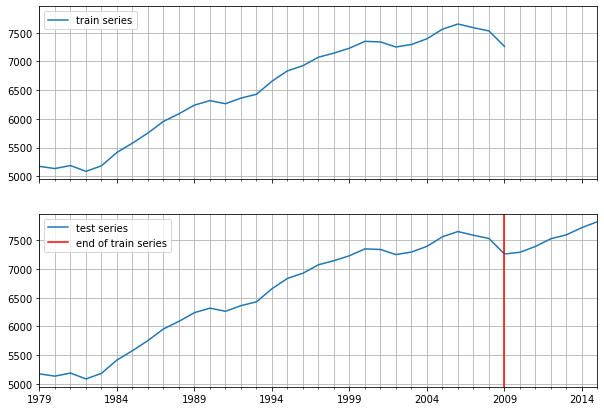

In [76]:
test_series = to_pandas(test_entry)
train_series = to_pandas(train_entry)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series.plot(ax=ax[1])
ax[1].axvline(train_series.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

### Tests

In [78]:
dataset = get_dataset("m4_yearly_d", regenerate=False)
train_entry = next(iter(dataset.train))
train_entry

INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_yearly_d.


{'start': Timestamp('1979-01-31 00:00:00', freq='12M'),
 'target': array([5172.1, 5133.5, 5186.9, 5084.6, 5182. , 5414.3, 5576.2, 5752.9,
        5955.2, 6087.8, 6238.9, 6317.2, 6262.7, 6361. , 6427.4, 6654.9,
        6835.4, 6925.5, 7073.5, 7144. , 7230.6, 7349.6, 7339.2, 7250.8,
        7294.6, 7393.9, 7560.9, 7651.4, 7587.3, 7530.5, 7261.1],
       dtype=float32),
 'feat_static_cat': array([1, 4]),
 'source': SourceContext(source=Span(path=WindowsPath('C:/Users/TM/.mxnet/gluon-ts/datasets/m4_yearly_d/train/data.json'), line=1), row=1)}

In [79]:
dataset = get_dataset("m4_yearly_d", regenerate=False)
train_entry = next(iter(dataset.train))
train_entry

INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_yearly_d.


{'start': Timestamp('1979-01-31 00:00:00', freq='12M'),
 'target': array([5172.1, 5133.5, 5186.9, 5084.6, 5182. , 5414.3, 5576.2, 5752.9,
        5955.2, 6087.8, 6238.9, 6317.2, 6262.7, 6361. , 6427.4, 6654.9,
        6835.4, 6925.5, 7073.5, 7144. , 7230.6, 7349.6, 7339.2, 7250.8,
        7294.6, 7393.9, 7560.9, 7651.4, 7587.3, 7530.5, 7261.1],
       dtype=float32),
 'feat_static_cat': array([1, 4]),
 'source': SourceContext(source=Span(path=WindowsPath('C:/Users/TM/.mxnet/gluon-ts/datasets/m4_yearly_d/train/data.json'), line=1), row=1)}

In [80]:
# standard imports
import numpy as np
import pandas as pd

# json
import json

# gluon data
# from gluonts.dataset.repository.datasets import get_dataset, dataset_recipes
from gluonts.dataset.util import to_pandas

# gluon imports
from gluonts.trainer import Trainer
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.evaluation import Evaluator

# model imports
# from gluonts.model.deepstate import DeepStateEstimator
# from gluonts.model.deep_factor import DeepFactorEstimator
from gluonts.model.deepar import DeepAREstimator

import mxnet as mx
from pprint import pprint

In [81]:
def deepar(data="m4_quarterly", seed=42, epochs=100, batches=50):
    
    dataset = get_dataset(data, regenerate=False)
    mx.random.seed(seed)
    np.random.seed(seed)
    
    trainer = Trainer(
        ctx=mx.cpu(0),
        epochs=epochs,      
        num_batches_per_epoch=batches,      
        learning_rate=1e-3,
    )
    
    cardinality = int(dataset.metadata.feat_static_cat[0].cardinality)
    estimator = DeepAREstimator(
        trainer=trainer,
        cardinality=[cardinality],
        context_length=dataset.metadata.prediction_length,
        prediction_length=dataset.metadata.prediction_length,
        freq=dataset.metadata.freq,
        use_feat_static_cat=True   
    )
        
    predictor = estimator.train(training_data=dataset.train, 
                                validation_data=dataset.test)
    
    forecast_it, ts_it = make_evaluation_predictions(
        dataset.test, predictor=predictor, num_samples=100
    )
    
    agg_metrics, item_metrics = Evaluator()(
        ts_it, forecast_it, num_series=len(dataset.test)
    )
    
    metrics = ["MASE", "sMAPE", "MSIS", "wQuantileLoss[0.5]", "wQuantileLoss[0.9]"]
    output = {key: round(value, 8) for key, value in agg_metrics.items() if key in metrics}
    output["epochs"] = epochs
    output["seed"] = seed
    return(output)


In [82]:
%%time
res = deepar(data="m4_yearly_d", seed=42, epochs=100, batches=100)
pprint(res)

INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_yearly_d.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/100 [00:00<?, ?it/s]

infer_shape error. Arguments:
  data0: (32, 2)
  data1: (32, 1)
  data2: (32, 13, 2)
  data3: (32, 13)
  data4: (32, 13)
  data5: (32, 6, 2)
  data6: (32, 6)
  data7: (32, 6)


  0%|          | 0/100 [00:00<?, ?it/s]


ValueError: Deferred initialization failed because shape cannot be inferred. Error in operator deepartrainingnetwork23_featureembedder0_squeeze0: [00:47:46] c:\jenkins\workspace\mxnet-tag\mxnet\src\operator\tensor\./matrix_op-inl.h:2178: Check failed: dshape[axes[i]] == 1 (2 vs. 1) cannot select an axis to squeeze out which has size=2 not equal to one

In [65]:
%%time
res = deepar(data="m4_yearly_micro", seed=42, epochs=100, batches=100)
pprint(res)

INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_yearly_micro.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 100/100 [00:04<00:00, 22.62it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[0] Elapsed time 4.421 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.208353
0it [00:00, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 356623
0it [00:04, ?it/s, validation_avg_epoch_loss=7.17]


GluonTSDateBoundsError: Out of bounds nanosecond timestamp: 2439-01-31 00:00:00

In [66]:
%%time
res = deepar(data="m4_yearly_macro", seed=42, epochs=100, batches=100)
pprint(res)

INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_yearly_macro.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 100/100 [00:04<00:00, 24.03it/s, avg_epoch_loss=8.2]
INFO:root:Epoch[0] Elapsed time 4.176 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.199407
0it [00:00, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 224873
141it [00:03, 43.52it/s, validation_avg_epoch_loss=7.82]
INFO:root:Epoch[0] Elapsed time 3.240 seconds
INFO:root:Epoch[0] Evaluation metric 'validation_epoch_loss'=7.816410
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 27.95it/s, avg_epoch_loss=7.58]
INFO:root:Epoch[1] Elapsed time 3.594 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.579007
138it [00:03, 40.05it/s, validation_avg_epoch_loss=7.61]
INFO:root:Epoch[1] Elapsed time 3.445 seconds
INFO:root:Epoch[1] Evaluation metric 'validation_epoch_loss'=7.614916
IN

INFO:root:Epoch[20] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 17.18it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[20] Elapsed time 5.825 seconds
INFO:root:Epoch[20] Evaluation metric 'epoch_loss'=6.470979
133it [00:03, 35.37it/s, validation_avg_epoch_loss=6.52]
INFO:root:Epoch[20] Elapsed time 3.760 seconds
INFO:root:Epoch[20] Evaluation metric 'validation_epoch_loss'=6.519896
INFO:root:Epoch[21] Learning rate is 0.001
100%|██████████| 100/100 [00:04<00:00, 20.82it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[21] Elapsed time 4.807 seconds
INFO:root:Epoch[21] Evaluation metric 'epoch_loss'=6.438703
130it [00:04, 29.65it/s, validation_avg_epoch_loss=6.56]
INFO:root:Epoch[21] Elapsed time 4.395 seconds
INFO:root:Epoch[21] Evaluation metric 'validation_epoch_loss'=6.557962
INFO:root:Epoch[22] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 17.97it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[22] Elapsed time 5.610 seconds
INFO:root:Epoch[22] Evaluation metric 'epoch_lo

136it [00:03, 40.96it/s, validation_avg_epoch_loss=6.42]
INFO:root:Epoch[40] Elapsed time 3.320 seconds
INFO:root:Epoch[40] Evaluation metric 'validation_epoch_loss'=6.419175
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:04<00:00, 22.83it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[41] Elapsed time 4.385 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=6.298940
134it [00:03, 41.42it/s, validation_avg_epoch_loss=6.4]
INFO:root:Epoch[41] Elapsed time 3.245 seconds
INFO:root:Epoch[41] Evaluation metric 'validation_epoch_loss'=6.395152
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 100/100 [00:04<00:00, 22.88it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[42] Elapsed time 4.375 seconds
INFO:root:Epoch[42] Evaluation metric 'epoch_loss'=6.329458
138it [00:03, 42.27it/s, validation_avg_epoch_loss=6.39]
INFO:root:Epoch[42] Elapsed time 3.280 seconds
INFO:root:Epoch[42] Evaluation metric 'validation_epoch_loss'=6.388925
INFO:root:Epoch[43] Learning rate i

INFO:root:Epoch[61] Learning rate is 0.0005
100%|██████████| 100/100 [00:05<00:00, 18.25it/s, avg_epoch_loss=6.23]
INFO:root:Epoch[61] Elapsed time 5.480 seconds
INFO:root:Epoch[61] Evaluation metric 'epoch_loss'=6.226771
135it [00:03, 35.29it/s, validation_avg_epoch_loss=6.37]
INFO:root:Epoch[61] Elapsed time 3.830 seconds
INFO:root:Epoch[61] Evaluation metric 'validation_epoch_loss'=6.366039
INFO:root:Epoch[62] Learning rate is 0.0005
100%|██████████| 100/100 [00:04<00:00, 21.32it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[62] Elapsed time 4.695 seconds
INFO:root:Epoch[62] Evaluation metric 'epoch_loss'=6.284721
136it [00:03, 39.60it/s, validation_avg_epoch_loss=6.36]
INFO:root:Epoch[62] Elapsed time 3.450 seconds
INFO:root:Epoch[62] Evaluation metric 'validation_epoch_loss'=6.363498
INFO:root:Epoch[63] Learning rate is 0.0005
100%|██████████| 100/100 [00:04<00:00, 20.16it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[63] Elapsed time 4.970 seconds
INFO:root:Epoch[63] Evaluation metric 'epoch

135it [00:03, 40.54it/s, validation_avg_epoch_loss=6.33]
INFO:root:Epoch[81] Elapsed time 3.335 seconds
INFO:root:Epoch[81] Evaluation metric 'validation_epoch_loss'=6.329335
INFO:root:Epoch[82] Learning rate is 0.0005
100%|██████████| 100/100 [00:04<00:00, 22.35it/s, avg_epoch_loss=6.21]
INFO:root:Epoch[82] Elapsed time 4.475 seconds
INFO:root:Epoch[82] Evaluation metric 'epoch_loss'=6.210744
137it [00:03, 40.77it/s, validation_avg_epoch_loss=6.34]
INFO:root:Epoch[82] Elapsed time 3.375 seconds
INFO:root:Epoch[82] Evaluation metric 'validation_epoch_loss'=6.339523
INFO:root:Epoch[83] Learning rate is 0.0005
100%|██████████| 100/100 [00:04<00:00, 21.67it/s, avg_epoch_loss=6.22]
INFO:root:Epoch[83] Elapsed time 4.630 seconds
INFO:root:Epoch[83] Evaluation metric 'epoch_loss'=6.219532
135it [00:03, 40.06it/s, validation_avg_epoch_loss=6.36]
INFO:root:Epoch[83] Elapsed time 3.375 seconds
INFO:root:Epoch[83] Evaluation metric 'validation_epoch_loss'=6.356165
INFO:root:Epoch[84] Learning ra

{'MASE': 3.13779313,
 'MSIS': 47.70186395,
 'epochs': 100,
 'sMAPE': 0.14300612,
 'seed': 42,
 'wQuantileLoss[0.5]': 0.1380955,
 'wQuantileLoss[0.9]': 0.08117509}
Wall time: 17min 28s


In [67]:
%%time
res = deepar(data="m4_yearly_industry", seed=42, epochs=100, batches=100)
pprint(res)

INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_yearly_industry.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/100 [00:02<?, ?it/s, avg_epoch_loss=8.73]


GluonTSDateBoundsError: Out of bounds nanosecond timestamp: 2585-01-31 00:00:00

In [47]:
!jupyter nbconvert --output-dir="./html_outputs" --to html GluonTS10-own-m4_subsets.ipynb

[NbConvertApp] Converting notebook GluonTS10-own-m4_subsets.ipynb to html
[NbConvertApp] Writing 396577 bytes to ./html_outputs\GluonTS10-own-m4_subsets.html
